# 10.1 Pipeline

Massen oder Volumenstrom rein = das selbe raus
$$dV/dt|_A =\dot{V}_A = dV/dt|_C + dV/dt|_D = 2\dot{V}$$

$u_A$ ist Geschwindigkeit der Strömung bei A.

$d^2\pi/4$ ist Querschnittsfläche des Rohres bei A, C un D mit Durchmesser $d$. Die Rohre sind überall gleich dick.

$$\dot{V}_A := d^2\pi/4 \cdot u_A = 2\dot{V}$$

Reynoldszahl ist ${Re}=\rho \cdot u_A \cdot d / \eta$.

Mit ${Re} = \rho \cdot u_A \cdot d / \eta < {Re}_K=2300$ (${Re}_K$ hängt von Literatur ab)

$$\Rightarrow u_A = \frac{{Re}_K\cdot \eta}{\rho\cdot d}$$

$$\Rightarrow u_A=\frac{8\dot V}{d^2\pi}=\frac{{Re}_K\cdot \eta}{\rho\cdot d}$$

Bernoulli:
$$p_A + \frac{1}{2}\rho u_A^2 = p_{Ende} + \frac{1}{2}\rho u_{Ende}^2$$

$$u_{Ende} = \frac{\dot{V}}{d^2\pi/4}$$
$$p_{Ende} = p_0$$

Auflösen auf $p_A$.

# 10.1 Pipeline Musterlösung

2 und 3 müssen nicht das gleiche Rohrvolumen und nicht den gleichen Radius haben

Druckgradient:
$\frac{p_B-p_0}{l_2}$; $\frac{p_B-p_0}{l_3}$ ist unterschiedlich

[Gesetz von Hagen-Poiseuille](https://de.wikipedia.org/wiki/Gesetz_von_Hagen-Poiseuille):
$$\dot{V}_2=\frac{\pi}{8\eta}R_2^4\frac{p_B-p_0}{l_2}$$
$$\dot{V}_3=\frac{\pi}{8\eta}R_3^4\frac{p_B-p_0}{l_3}$$
Da $\dot{V}_2=\dot{V}_3$ gilt:
$$\Rightarrow \frac{R_2}{R_3}=\sqrt[4]{\frac{l_2}{l_3}}$$


Mit ${Re} = \rho \cdot \bar v \cdot 2R / \eta < {Re}_K=2300$ (${Re}_K$ hängt von Literatur ab)

$$\dot{V} := R^2\pi \cdot \bar v$$
$$\dot{V}_A = 2\dot{V}_2 = 2\dot{V}_3$$

$$R < \frac{Re_K\eta}{2\rho\bar v}=\frac{Re_K\eta}{2\rho}\frac{\pi R^2}{\dot{V_A}}$$
$$R_1 > \frac{2\rho\dot{V_A}}{\pi\eta Re_K}=\frac{4\rho\dot{V}}{\pi\eta Re_K}$$

$$R_2=\frac{2\rho\dot{V}}{\pi\eta Re_K}$$

$$R_3=R_2\cdot\sqrt[4]{\frac{l_3}{l_2}}=\frac{2\rho\dot{V}}{\pi\eta Re_K}\cdot\sqrt[4]{\frac{l_3}{l_2}}$$

$$\Delta p_2=p_B-p_0=\dot V\cdot \frac{l_2}{R_2^4}\frac{8\eta}{\pi}$$

$$\Delta p_1 = p_A - p_B = 2\dot V\cdot \frac{l_1}{R_1^4}\frac{8\eta}{\pi}$$

$$p_A = \Delta p_1 + \Delta p_2 + p_0= \dot V\frac{8\eta}{\pi}(\frac{2l_1}{R_1^4}+\frac{l_2}{R_2^4}) + p_0$$

Einsetzen von $R_1^4$ und $R_2^4$ ergibt:

$$p_A=p_0+\dot V\frac{8\eta}{\pi}(\frac{2l_1}{(\frac{4\rho\dot{V}}{\pi\eta Re_K})^4}+\frac{l_2}{(\frac{2\rho\dot{V}}{\pi\eta Re_K})^4})$$

$$=p_0+\dot V\frac{8\eta}{\pi}\left(\frac{\pi\eta Re_K}{2\rho\dot{V}}\right)^4(\frac{1}{8}l_1+l_2)$$

Bernoulli darf nicht angewendet werden. Bernoulli nur wenn Flüssigkeit als reibungsfrei angenommen wird. Dann dürfte kein $\eta$ angegeben werden.

# 10.1 Pipeline mit Sympy

In [3]:
from sympy import *
from sympy.solvers import solve
init_printing()

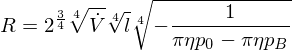

In [4]:
dotV = Symbol("\dot V", positive=True)
eta = Symbol("\eta", positive=True)
R = Symbol("R", positive=True)
p_B = Symbol("p_B", positive=True)
p_0 = Symbol("p_0", positive=True)
l = Symbol("l", positive=True)
e1 = Eq(dotV, (pi/8*eta)*R**4*((p_B-p_0)/l))
eR = Eq(R, solve(e1, R)[1])
eR


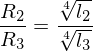

In [19]:
dotV_0 = Symbol("\dot V_0", positive=True)

dotV_1 = Symbol("\dot V_1", positive=True)
R_1 = Symbol("R_1", positive=True)
l_1 = Symbol("l_1", positive=True)

dotV_2 = Symbol("\dot V_2", positive=True)
R_2 = Symbol("R_2", positive=True)
l_2 = Symbol("l_2", positive=True)

dotV_3 = Symbol("\dot V_3", positive=True)
R_3 = Symbol("R_3", positive=True)
l_3 = Symbol("l_3", positive=True)

e2 = Eq(dotV_2, dotV_0)
e3 = Eq(dotV_3, dotV_0)
e31 = Eq(dotV_1, 2*dotV_0)

eR_2_over_R_3 = simplify(eR.rhs.subs(dotV, dotV_0).subs(l, l_2) / eR.rhs.subs(dotV, dotV_0).subs(l, l_3))
Eq(R_2/R_3, eR_2_over_R_3)

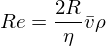

In [6]:
Re = Symbol("Re", positive=True)
Re_K = Symbol("Re_K", positive=True)
rho = Symbol("\\rho", positive=True)
barv = Symbol("\\bar v", positive=True)
R = Symbol("R", positive=True)
e4 = Eq(Re,2*R*rho*barv/eta)
e4

In [7]:
e5 = Eq(dotV, pi*R**2*barv)
e5

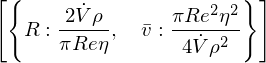

In [8]:
solve([e4, e5], [barv, R], dict=True)

---
The above solution, to provide two equations and ask for two variables to solve for is preferrable.
But just to do it once "by foot" and step by step manually see the next three lines:

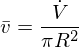

In [9]:
Eq(barv, solve(e5, barv)[0])

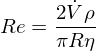

In [10]:
e4.subs(barv, solve(e5, barv)[0])

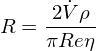

In [11]:
Eq(R, solve(e4.subs(barv, solve(e5, barv)[0]), R)[0])

So back to the main calculation again

---

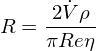

In [13]:
rR = Eq(R,solve([e4, e5], [barv, R], dict=True)[0][R])
rR

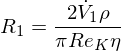

In [21]:
rR_1 = rR.subs(Re, Re_K).subs(R,R_1).subs(dotV, dotV_1)
rR_1

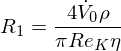

In [24]:
rR_1 = Eq(R_1, solve([rR_1, e31], [R_1, dotV_1], dict=True)[0][R_1])
rR_1

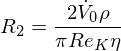

In [25]:
rR_2 = rR.subs(Re, Re_K).subs(R,R_2).subs(dotV, dotV_2)
rR_2 = Eq(R_2, solve([rR_2, e2], [R_2, dotV_2], dict=True)[0][R_2])
rR_2

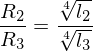

In [28]:
rR2_over_R3 = Eq(R_2/R_3, eR_2_over_R_3)
rR2_over_R3

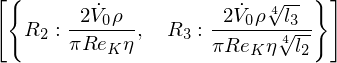

In [29]:
solve([rR2_over_R3, rR_2], [R_2, R_3], dict=True)

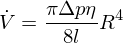

In [30]:
Delta_p = Symbol("\Delta p", positive=True)
eDelta_p = Eq(dotV, (pi/8*eta)*R**4*((Delta_p)/l))
eDelta_p

In [31]:
Delta_p_2 = Symbol("\Delta p_2", positive=True)
eDelta_p_2 = Eq(Delta_p_2, p_B - p_0)
eDelta_p_2

In [32]:
p_A = Symbol("p_A", positive=True)
Delta_p_1 = Symbol("\Delta p_1", positive=True)
eDelta_p_1 = Eq(Delta_p_1, p_A - p_B)
eDelta_p_1

In [39]:
rp_A = Eq(p_A, solve([eDelta_p_1, eDelta_p_2], [p_A, p_B], dict=True)[0][p_A])
rp_A

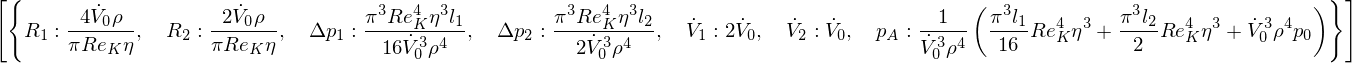

In [47]:
eHP1 = eDelta_p.subs(R,R_1).subs(l,l_1).subs(dotV, dotV_1).subs(Delta_p, Delta_p_1)
eHP2 = eDelta_p.subs(R,R_2).subs(l,l_2).subs(dotV, dotV_2).subs(Delta_p, Delta_p_2)
rp_A_and_others = solve([rp_A, eHP1, eHP2, e2, e31, rR_1, rR_2], [p_A, Delta_p_1, Delta_p_2, dotV_1, dotV_2, R_1, R_2], dict=True)
rp_A_and_others

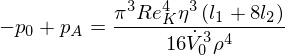

In [50]:
Eq(p_A - p_0, simplify(rp_A_and_others[0][p_A]-p_0))
